# sPlotOpen Preprocessing

sPlotOpen (Sabatini et al, 2021) is an open-access and environmentally and spatially balanced subset of the global sPlot vegetation plots data set v2.1 (Bruelheide et al, 2019).

This section covers:

- Link plot coordinates with community wighted means (cwm)
- Visualize plot density


## Assignments
...

## Download

sPlotOpen Data is available at the *iDiv Data Repository*. For this study we used version 52.

https://idata.idiv.de/ddm/Data/ShowData/3474



## Packages

In [61]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm, Normalize
import cartopy.crs as ccrs
import cartopy as cart
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [62]:
# Set the path to our working directory (where your data is stored)
working_directory = "G:/My Drive/teaching/2024_msc_remotesensing_geoinformatics/"
os.chdir(working_directory)

## Link plot coordinates to cmw data

The data is stored in various tab-separated files:

- **sPlotOpen_header(2).txt** : contains information on each plot, such as coordinates, date, biome, country, etc.


- **sPlotOpen_DT(1).txt** : contains information per plot and species with abundance and relative cover


- **sPlotOpen_CWM_CWV(1).txt** : contains information on trait community weighted means and variances for each plot and 18 traits (ln-transformed)


In [63]:
# load the community weighted means

cwm = pd.read_csv("data/sPlotOpen_original_3474_76_Dataset/sPlotOpen_CWM_CWV.txt", sep= "\t")

In [64]:
plots = pd.read_csv("data/sPlotOpen_original_3474_76_Dataset/sPlotOpen_header.txt", sep= "\t")

C:\Users\teja\AppData\Local\Temp\ipykernel_24540\1782977492.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  plots = pd.read_csv("data/sPlotOpen_original_3474_76_Dataset/sPlotOpen_header.txt", sep= "\t")


In [65]:
sPlot = pd.merge(plots, cwm, on='PlotObservationID', how='inner')

In [66]:
sPlot.head()

,PlotObservationID,GIVD_ID,Dataset,Continent,Country,Biome,Date_of_recording,Latitude,Longitude,Location_uncertainty,...,Seed_length_CWV,LDMC_CWV,LeafNperArea_CWV,LeafNPratio_CWV,Leaf_delta_15N_CWV,Seed_num_rep_unit_CWV,Leaffreshmass_CWV,Stem_cond_dens_CWV,Disp_unit_leng_CWV,Wood_vessel_length_CWV
0,16,NA-US-014,Aava,North America,United States,Boreal zone,1980-01-01,62.42,-154.18,1000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17,NA-US-014,Aava,North America,United States,Boreal zone,1980-01-01,62.42,-154.18,1000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18,NA-US-014,Aava,North America,United States,Boreal zone,1980-01-01,62.42,-154.18,1000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20,NA-US-014,Aava,North America,United States,Boreal zone,1980-01-01,62.42,-154.18,1000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,22,NA-US-014,Aava,North America,United States,Boreal zone,1980-01-01,62.42,-154.18,1000.0,...,0.011436,0.041385,0.022313,0.017075,0.186384,1.315851,0.306499,0.163156,0.052239,0.002832


In [67]:
sPlot.columns

Index(['PlotObservationID', 'GIVD_ID', 'Dataset', 'Continent', 'Country',
       'Biome', 'Date_of_recording', 'Latitude', 'Longitude',
       'Location_uncertainty', 'Releve_area', 'Plant_recorded', 'Elevation',
       'Aspect', 'Slope', 'is_forest', 'ESY', 'Naturalness', 'Forest',
       'Shrubland', 'Grassland', 'Wetland', 'Sparse_vegetation', 'Cover_total',
       'Cover_tree_layer', 'Cover_shrub_layer', 'Cover_herb_layer',
       'Cover_moss_layer', 'Cover_lichen_layer', 'Cover_algae_layer',
       'Cover_litter_layer', 'Cover_bare_rocks', 'Cover_cryptogams',
       'Cover_bare_soil', 'Height_trees_highest', 'Height_trees_lowest',
       'Height_shrubs_highest', 'Height_shrubs_lowest', 'Height_herbs_average',
       'Height_herbs_lowest', 'Height_herbs_highest', 'SoilClim_PC1',
       'SoilClim_PC2', 'Resample_1', 'Resample_2', 'Resample_3',
       'Resample_1_consensus', 'TraitCoverage_cover', 'Species_richness',
       'TraitCoverage_pa', 'LeafArea_CWM', 'StemDens_CWM', 'SLA_CWM

In [68]:
# remove columns that include CWV in the name (not needed for the moment)
sPlot = sPlot[sPlot.columns.drop(list(sPlot.filter(regex='CWV')))]
sPlot.columns

Index(['PlotObservationID', 'GIVD_ID', 'Dataset', 'Continent', 'Country',
       'Biome', 'Date_of_recording', 'Latitude', 'Longitude',
       'Location_uncertainty', 'Releve_area', 'Plant_recorded', 'Elevation',
       'Aspect', 'Slope', 'is_forest', 'ESY', 'Naturalness', 'Forest',
       'Shrubland', 'Grassland', 'Wetland', 'Sparse_vegetation', 'Cover_total',
       'Cover_tree_layer', 'Cover_shrub_layer', 'Cover_herb_layer',
       'Cover_moss_layer', 'Cover_lichen_layer', 'Cover_algae_layer',
       'Cover_litter_layer', 'Cover_bare_rocks', 'Cover_cryptogams',
       'Cover_bare_soil', 'Height_trees_highest', 'Height_trees_lowest',
       'Height_shrubs_highest', 'Height_shrubs_lowest', 'Height_herbs_average',
       'Height_herbs_lowest', 'Height_herbs_highest', 'SoilClim_PC1',
       'SoilClim_PC2', 'Resample_1', 'Resample_2', 'Resample_3',
       'Resample_1_consensus', 'TraitCoverage_cover', 'Species_richness',
       'TraitCoverage_pa', 'LeafArea_CWM', 'StemDens_CWM', 'SLA_CWM

### Change columns name

In [69]:
# only variables not of interest have mixed data types
types = sPlot.applymap(type).apply(set)
types[types.apply(len) > 1]

C:\Users\teja\AppData\Local\Temp\ipykernel_24540\3023265235.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  types = sPlot.applymap(type).apply(set)


Date_of_recording     {<class 'float'>, <class 'str'>}
is_forest            {<class 'float'>, <class 'bool'>}
ESY                   {<class 'float'>, <class 'str'>}
Naturalness           {<class 'float'>, <class 'str'>}
Forest               {<class 'float'>, <class 'bool'>}
Shrubland            {<class 'float'>, <class 'bool'>}
Grassland            {<class 'float'>, <class 'bool'>}
Wetland              {<class 'float'>, <class 'bool'>}
Sparse_vegetation    {<class 'float'>, <class 'bool'>}
dtype: object

Rename the trait columns to match the TRY summary stats:

In [70]:
sPlot.rename(columns = {'StemDens_CWM':'Stem specific density (SSD)'}, inplace = True)
sPlot.rename(columns = {'LeafC_perdrymass_CWM':'Leaf carbon (C) per mass'}, inplace = True)
sPlot.rename(columns = {'LeafN_CWM':'Leaf nitrogen (N) per mass'}, inplace = True)
sPlot.rename(columns = {'LeafP_CWM':'Leaf phosphorus (P) per mass'}, inplace = True)
sPlot.rename(columns = {'LDMC_CWM':'Leaf dry mass per leaf fresh mass (LDMC)'}, inplace = True)
sPlot.rename(columns = {'SeedMass_CWM':'Seed mass'}, inplace = True)
sPlot.rename(columns = {'Seed_length_CWM':'Seed length'}, inplace = True)
sPlot.rename(columns = {'LeafNperArea_CWM':'Leaf nitrogen (N) per area'}, inplace = True)
sPlot.rename(columns = {'LeafNPratio_CWM':'Leaf nitrogen/phosphorus (N/P)'}, inplace = True)
sPlot.rename(columns = {'Leaf_delta_15N_CWM':'Leaf delta15N'}, inplace = True)
sPlot.rename(columns = {'Leaffreshmass_CWM':'Leaf fresh mass'}, inplace = True)
sPlot.rename(columns = {'Seed_num_rep_unit_CWM':'Seeds per rep. unit'}, inplace = True)
sPlot.rename(columns = {'Stem_cond_dens_CWM':'Stem conduit density'}, inplace = True)
sPlot.rename(columns = {'Disp_unit_leng_CWM':'Dispersal unit length'}, inplace = True)
sPlot.rename(columns = {'Wood_vessel_length_CWM':'Conduit element length'}, inplace = True)
sPlot.rename(columns = {'PlantHeight_CWM':'Plant Height'}, inplace = True)
sPlot.rename(columns = {'LeafArea_CWM':'Leaf Area (all undefined)'}, inplace = True)
sPlot.rename(columns = {'SLA_CWM':'Specific Leaf Area (SLA)'}, inplace = True)

Replace infinite values with ```NaN```

In [71]:
sPlot = sPlot.replace(-np.inf, np.nan)
sPlot = sPlot.replace(np.inf, np.nan)

In [72]:
sPlot.head()

,PlotObservationID,GIVD_ID,Dataset,Continent,Country,Biome,Date_of_recording,Latitude,Longitude,Location_uncertainty,...,Seed length,Leaf dry mass per leaf fresh mass (LDMC),Leaf nitrogen (N) per area,Leaf nitrogen/phosphorus (N/P),Leaf delta15N,Seeds per rep. unit,Leaf fresh mass,Stem conduit density,Dispersal unit length,Conduit element length
0,16,NA-US-014,Aava,North America,United States,Boreal zone,1980-01-01,62.42,-154.18,1000.0,...,1.046333,-1.150683,0.024882,1.874128,-0.264750,5.633945,-4.387745,3.483073,1.470741,5.859517
1,17,NA-US-014,Aava,North America,United States,Boreal zone,1980-01-01,62.42,-154.18,1000.0,...,1.046333,-1.150683,0.024882,1.874128,-0.264750,5.633945,-4.387745,3.483073,1.470741,5.859517
2,18,NA-US-014,Aava,North America,United States,Boreal zone,1980-01-01,62.42,-154.18,1000.0,...,1.046333,-1.150683,0.024882,1.874128,-0.264750,5.633945,-4.387745,3.483073,1.470741,5.859517
3,20,NA-US-014,Aava,North America,United States,Boreal zone,1980-01-01,62.42,-154.18,1000.0,...,0.126305,-1.325711,0.107715,1.999404,-0.076209,3.036499,-4.124691,5.337666,0.252902,6.570591
4,22,NA-US-014,Aava,North America,United States,Boreal zone,1980-01-01,62.42,-154.18,1000.0,...,0.118110,-1.376588,0.122927,2.036662,0.073539,3.451333,-3.968128,5.380727,0.242525,6.558434


Save this dataframe as ```csv```.

In [73]:
sPlot.to_csv("exports/cwm_loc.csv", index=False)

## Plot density

In [74]:
def gridmap(long, lat, label, projection, colorbar=True):
    
    plt.rcParams.update({'font.size': 15})

    Z, xedges, yedges = np.histogram2d(np.array(long,dtype=float),
                                   np.array(lat),bins = [181, 91])

    #https://stackoverflow.com/questions/67801227/color-a-2d-histogram-not-by-density-but-by-the-mean-of-a-third-column
    #https://medium.com/analytics-vidhya/custom-strava-heatmap-231267dcd084
    
    #let function know what projection provided data is in:
    data_crs = ccrs.PlateCarree()
    
    #for colorbar
    cmap = plt.get_cmap('cool')
    im_ratio = Z.shape[0]/Z.shape[1]

    #plot map
    #create base plot of a world map
    ax = fig.add_subplot(1, 1, 1, projection=projection) # I used the PlateCarree projection from cartopy
    
    # set figure to map global extent (-180,180,-90,90)
    ax.set_global()
    
    #add coastlines
    ax.coastlines(resolution='110m', color='orange', linewidth=1.3)
    
    #add grid with values
    im = ax.pcolormesh(xedges, yedges, Z.T, cmap="cool", norm=LogNorm(), transform=data_crs) #, vmax = 400000)
    
    #add color bar
    if colorbar==True:
        fig.colorbar(im,fraction=0.046*im_ratio, pad=0.04, shrink=0.3, location="left", label=label)



Apply the ```gridmap``` function to plot a 2D histogramm of the sPlotOpen plots and save output as ```.pdf```. You can also experiment with other projections. See https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html for inspiration.

In [75]:
sPlot.Longitude

0       -154.180000
1       -154.180000
2       -154.180000
3       -154.180000
4       -154.180000
            ...    
95099     27.273862
95100     23.598014
95101     23.598014
95102     22.147667
95103     26.892074
Name: Longitude, Length: 95104, dtype: float64

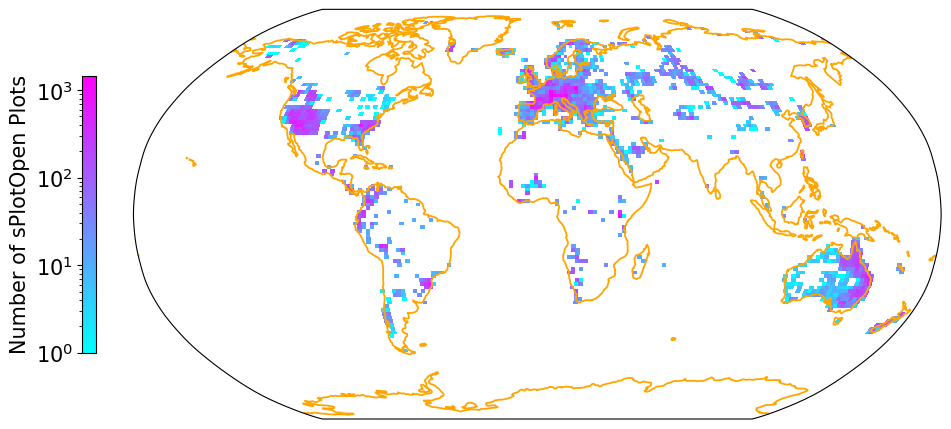

In [76]:
fig = plt.figure(figsize=(12, 12))
gridmap(sPlot['Longitude'], sPlot['Latitude'], "Number of sPlotOpen Plots", projection = ccrs.Robinson())
plt.savefig('figures/sPlot_density_Robinson_all.pdf', bbox_inches='tight')